In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


In [ ]:

# Load the dataset
data = pd.read_csv("heart_attack_prediction_dataset.csv")

# Display dataset info
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


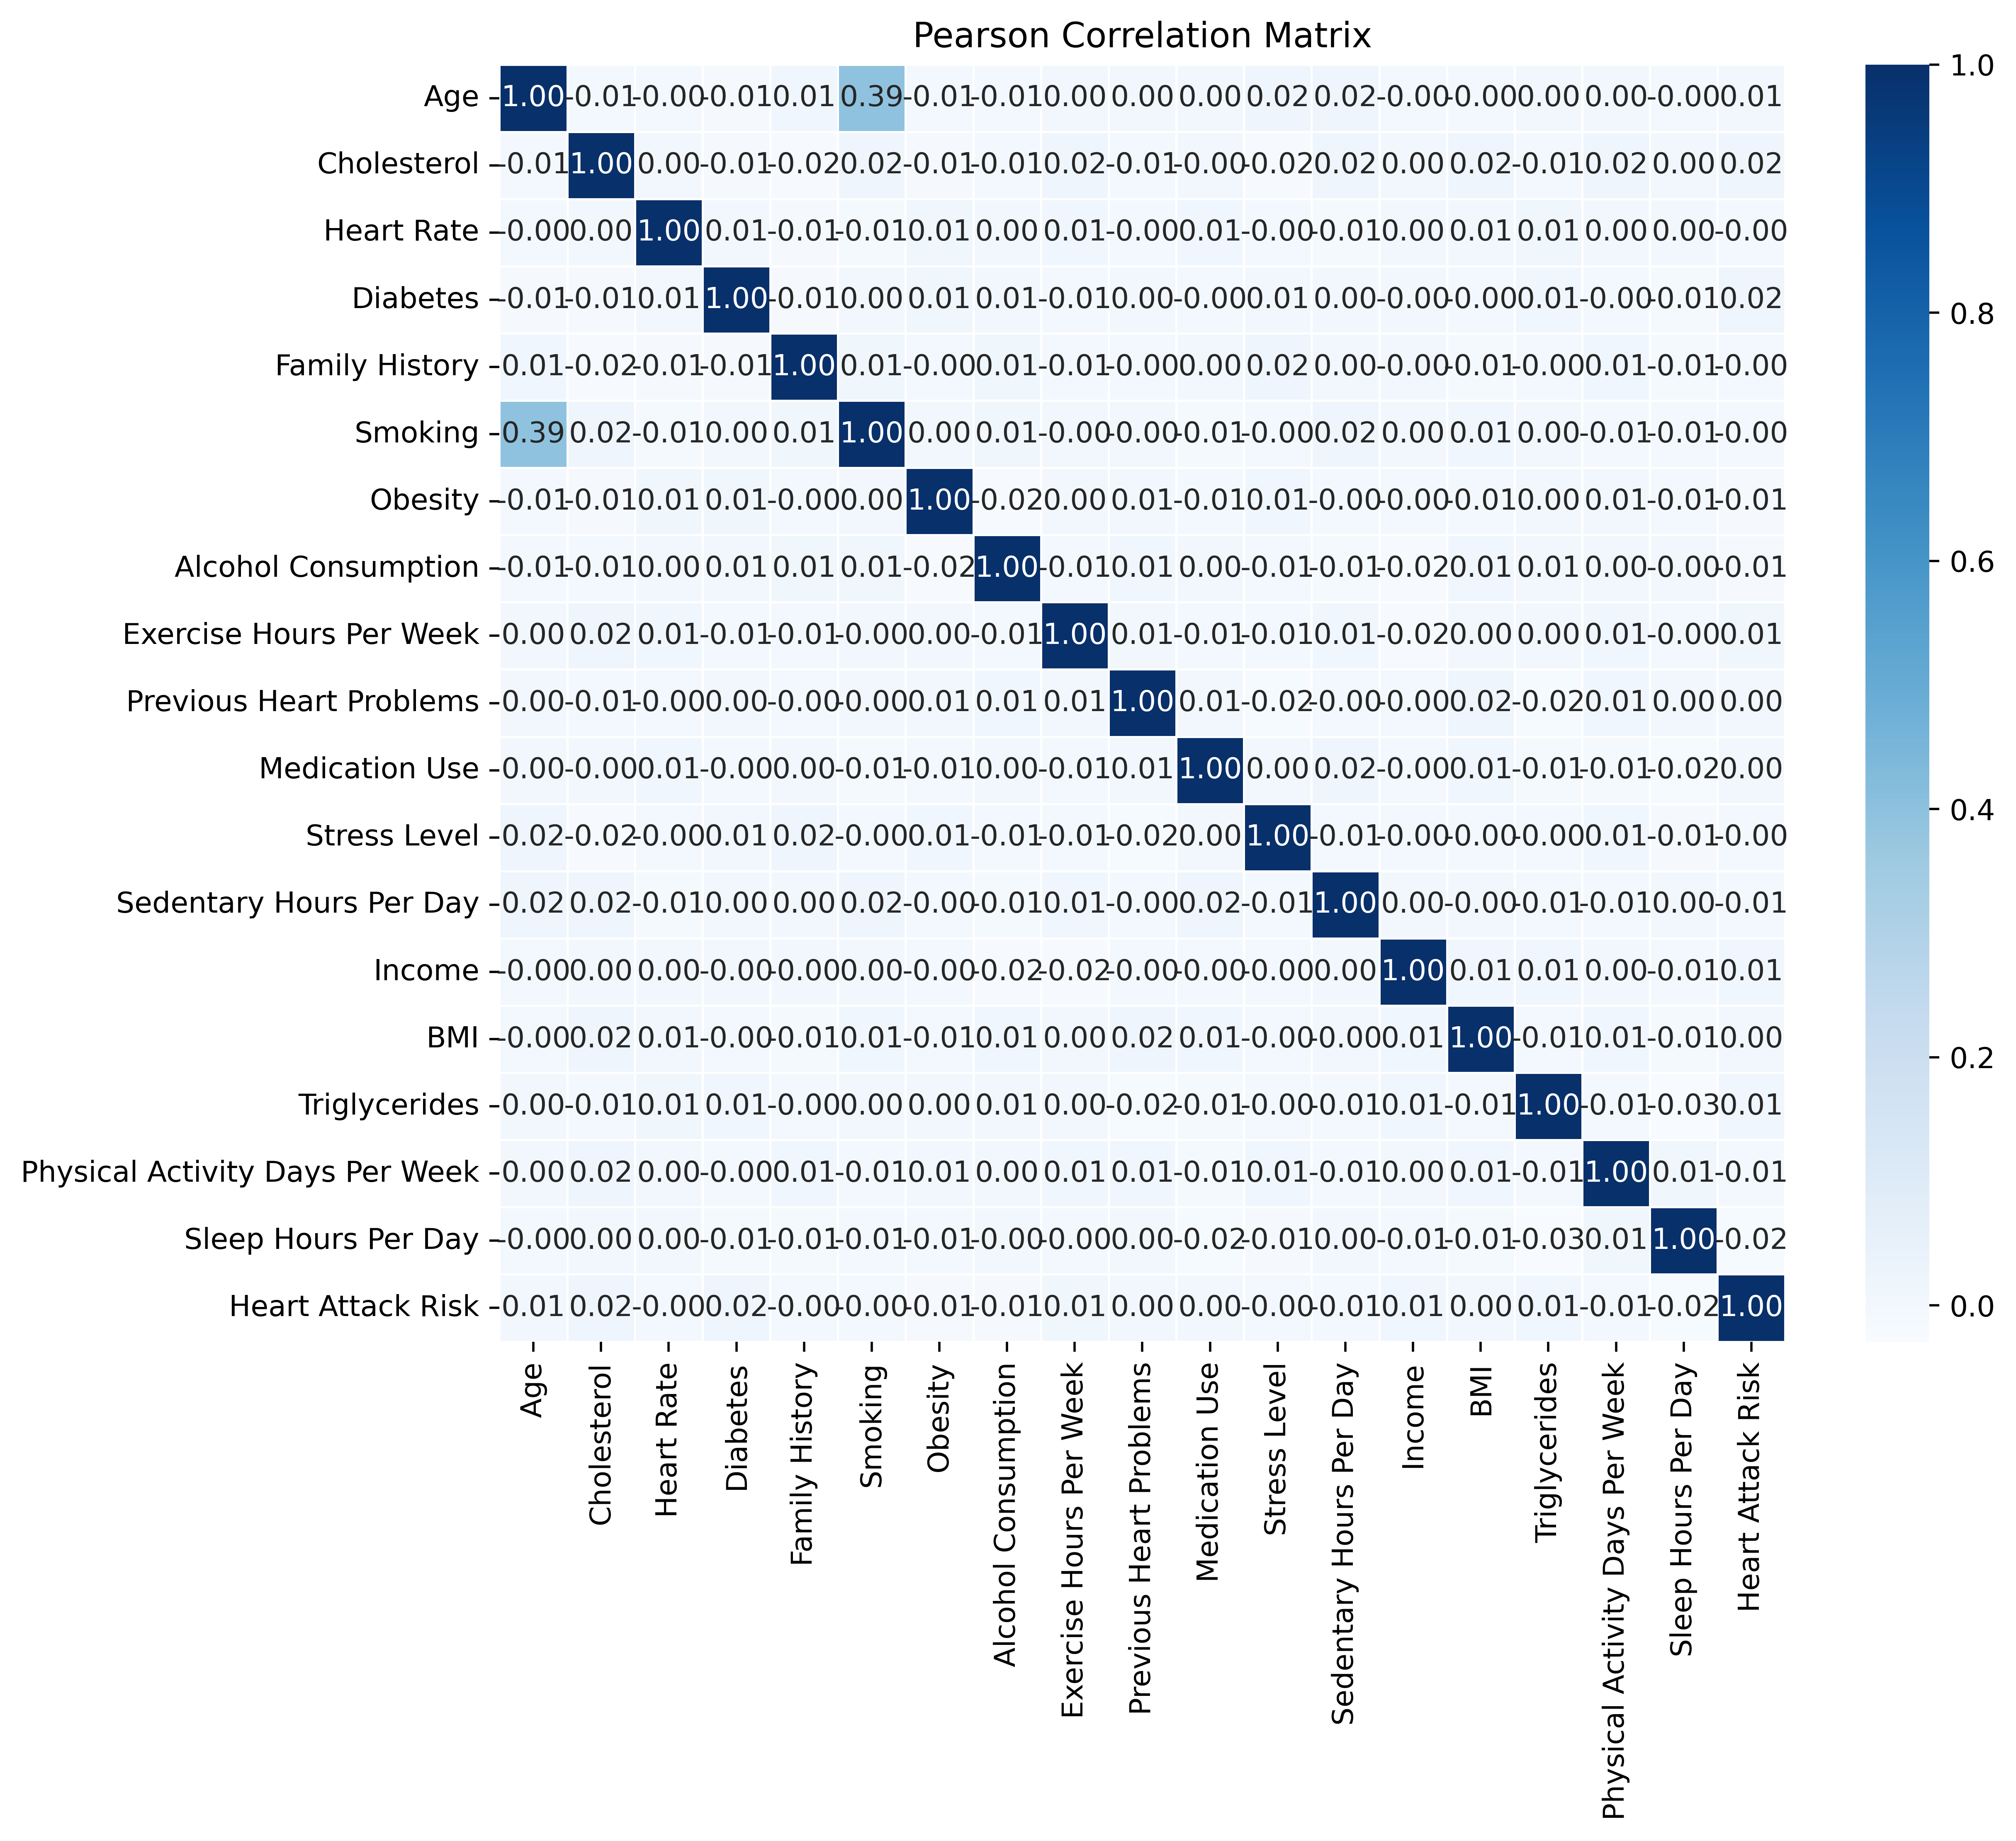

In [ ]:
# Correlation matrix
corr = data.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10, 8), dpi=500)
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5, cmap="Blues")
plt.title('Pearson Correlation Matrix')
plt.show()

In [ ]:
# Drop unnecessary columns
data = data.drop(['Patient ID', 'Country', 'Continent', 'Hemisphere'], axis=1)

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Diet'] = label_encoder.fit_transform(data['Diet'])

In [ ]:
# Split Blood Pressure into Systolic and Diastolic
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)
data = data.drop(columns=['Blood Pressure'])

In [ ]:
# Scaling features
columns_to_scale = ['Age', 'Heart Rate', 'BMI', 'Triglycerides', 'Income', 'Exercise Hours Per Week', 'Sleep Hours Per Day']
scaler = RobustScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Define features and target

In [ ]:
X = data.drop(columns=['Heart Attack Risk'])
y = data['Heart Attack Risk']


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 
Accuracy: 0.6432103461392165
F1 Score: 0.5035503219080625
Confusion Matrix:
 [[1691    0]
 [ 938    0]]


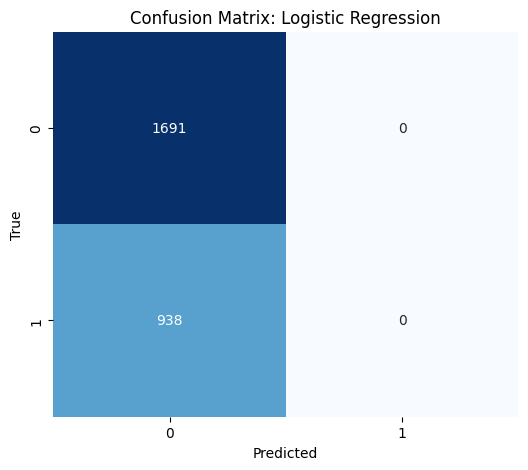

In [ ]:
# Logistic Regression without SMOTE
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression ")
print("Accuracy:", accuracy_lr)
print("F1 Score:", f1_lr)

print("Confusion Matrix:\n", conf_matrix_lr)
# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Logistic Regression (with SMOTE)
Accuracy: 0.5290985165462153
F1 Score: 0.5331923365119596
Confusion Matrix:
 [[1030  661]
 [ 577  361]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


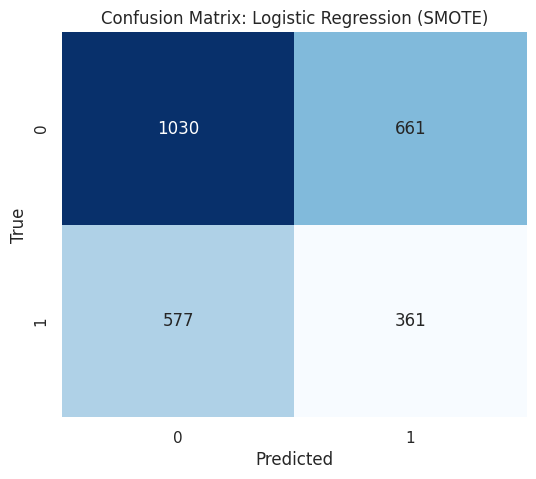

In [ ]:
# Logistic Regression with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
lr_model_smote = LogisticRegression()
lr_model_smote.fit(X_resampled, y_resampled)
y_pred_lr_smote = lr_model_smote.predict(X_test)
accuracy_lr_smote = accuracy_score(y_test, y_pred_lr_smote)
f1_lr_smote = f1_score(y_test, y_pred_lr_smote, average='weighted')
conf_matrix_lr_smote = confusion_matrix(y_test, y_pred_lr_smote)
print("Logistic Regression (with SMOTE)")
print("Accuracy:", accuracy_lr_smote)
print("F1 Score:", f1_lr_smote)
print("Confusion Matrix:\n", conf_matrix_lr_smote)

# Plot Confusion Matrix for Logistic Regression with SMOTE
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr_smote, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix: Logistic Regression (SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:

#cut this befor sendind
#cut this befor sendind
#cut this befor sendind
#cut this befor sendind

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply SMOTE to testing data (NOT RECOMMENDED)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

# Train Logistic Regression on resampled data
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict on SMOTE-resampled test data
y_pred = lr_model.predict(X_test_resampled)

# Evaluate Model
accuracy = accuracy_score(y_test_resampled, y_pred)
f1 = f1_score(y_test_resampled, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_resampled, y_pred)

# Print Results
print("Logistic Regression (with SMOTE on Train & Test)")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Logistic Regression (with SMOTE on Train & Test)
Accuracy: 0.5968888888888889
F1 Score: 0.5968849871337026
Confusion Matrix:
 [[675 450]
 [457 668]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(X_resampled, y_resampled)

           Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0     0.621622    1          346   -0.027778         0               0   
1     0.135135    0          287    0.361111         0               1   
2    -0.567568    1          185    0.111111         0               1   
3     0.540541    0          352    0.388889         0               0   
4    -0.675676    1          260   -0.694444         1               0   
...        ...  ...          ...         ...       ...             ...   
7861 -0.036810    1          371    0.508619         0               0   
7862 -0.288586    1          386    0.599461         0               1   
7863 -0.144515    1          375   -0.411911         0               1   
7864 -0.685134    0          232   -0.452854         0               0   
7865 -0.210925    0          254   -0.622127         0               0   

      Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0           1        0            

Random Forest with pca
Accuracy: 0.602890833016356
F1 Score: 0.5459158931410255
[[1451  240]
 [ 804  134]]


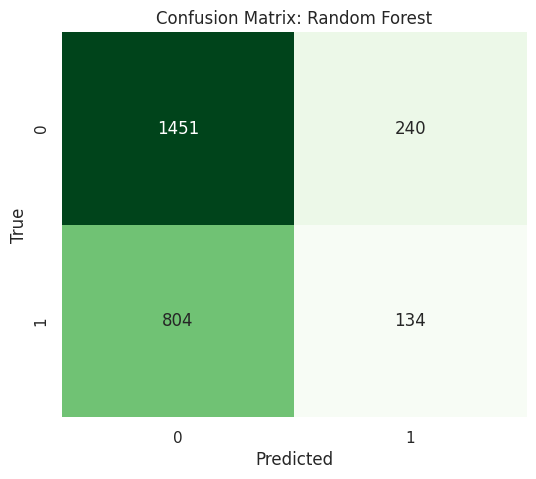

In [ ]:
# Random Forest with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train_pca)
y_pred_rf= rf_model.predict(X_test_pca)
accuracy_rf_pca= accuracy_score(y_test_pca, y_pred_rf)
f1_rf_pca = f1_score(y_test_pca, y_pred_rf, average='weighted')
conf_matrix_rf_pca= confusion_matrix(y_test_pca, y_pred_rf)
print("Random Forest with pca")
print("Accuracy:", accuracy_rf_pca)
print("F1 Score:", f1_rf_pca)
print(conf_matrix_rf_pca)


plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf_pca, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Random Forest without PCA
Accuracy: 0.6394066184861164
F1 Score: 0.5173352468968238
[[1657   34]
 [ 914   24]]


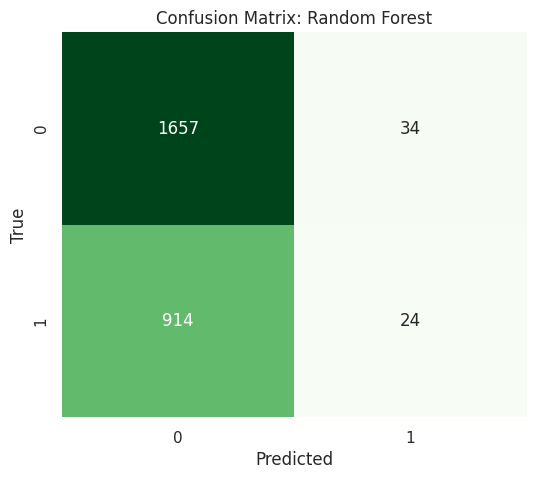

In [ ]:
# Random Forest without PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Results
print("Random Forest without PCA")
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print(conf_matrix_rf)

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Fitting 5 folds for each of 16 candidates, totalling 80 fits
KNN
Accuracy: 0.5933815138836059
F1 Score: 0.5485948782607768
[[1397  294]
 [ 775  163]]


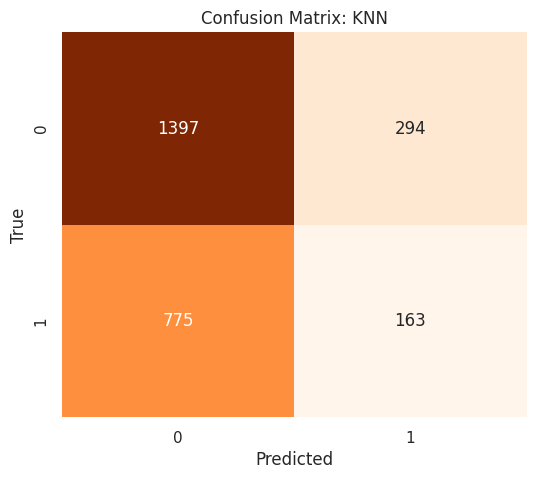

In [ ]:
# K-Nearest Neighbors (KNN) with GridSearchCV
knn_model = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN")
print("Accuracy:", accuracy_knn)
print("F1 Score:", f1_knn)
print(conf_matrix_knn)
# Plot Confusion Matrix for KNN
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix: KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:49:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost
Accuracy: 0.5800684670977558
F1 Score: 0.5608852401265182
[[1271  420]
 [ 684  254]]


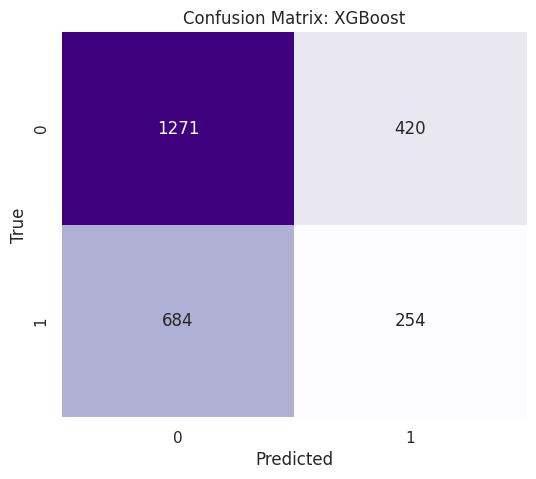

In [ ]:
# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("XGBoost")
print("Accuracy:", accuracy_xgb)
print("F1 Score:", f1_xgb)
print(conf_matrix_xgb)

# Plot Confusion Matrix for XGBoost
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



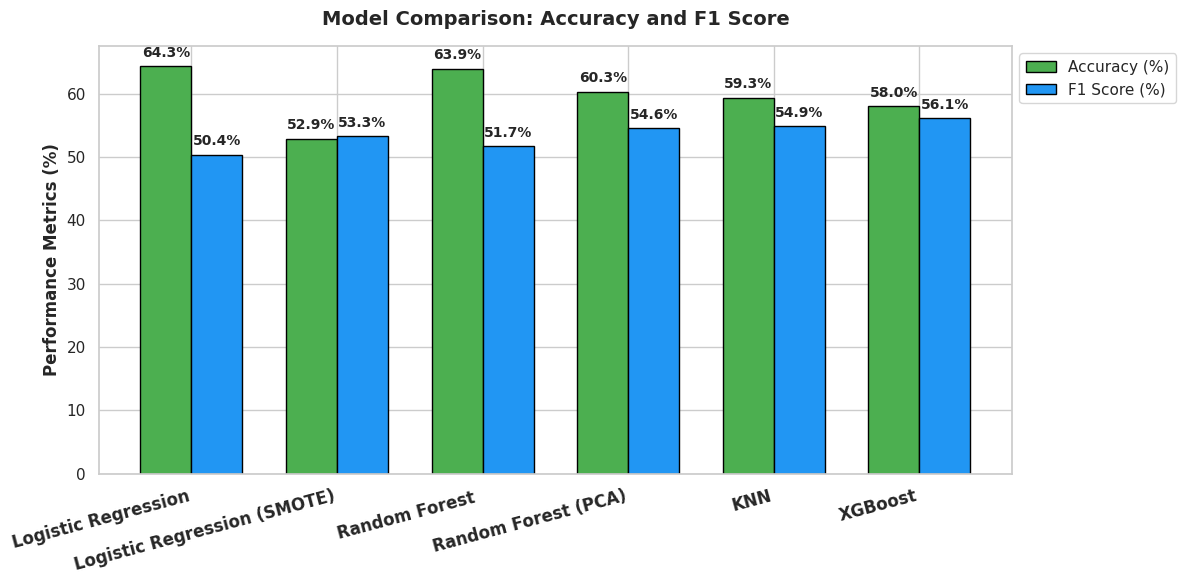

In [ ]:
# Data for visualization
models = ['Logistic Regression', 'Logistic Regression (SMOTE)', 'Random Forest ', 'Random Forest (PCA)', 'KNN', 'XGBoost']
accuracies = [accuracy_lr, accuracy_lr_smote, accuracy_rf, accuracy_rf_pca, accuracy_knn, accuracy_xgb]
f1_scores = [f1_lr, f1_lr_smote, f1_rf, f1_rf_pca, f1_knn, f1_xgb]

# Create the plot
sns.set_theme(style="whitegrid")
x = np.arange(len(models))  # Model positions on x-axis
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot Accuracy and F1 Score bars
bars1 = ax.bar(x - width/2, [a * 100 for a in accuracies], width, label='Accuracy (%)', color='#4CAF50', edgecolor='black')
bars2 = ax.bar(x + width/2, [f * 100 for f in f1_scores], width, label='F1 Score (%)', color='#2196F3', edgecolor='black')

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, fontsize=12, ha='right', weight='bold')
ax.set_ylabel('Performance Metrics (%)', fontsize=12, weight='bold')
ax.set_title('Model Comparison: Accuracy and F1 Score', fontsize=14, weight='bold', pad=15)
ax.legend(fontsize=11, loc='upper left', bbox_to_anchor=(1, 1))

# Annotate the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Optimize layout
plt.tight_layout()
plt.show()
